In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('water_dataX.csv',encoding="ISO-8859-1")
data.fillna(0,inplace=True)
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [3]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/1)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                          object
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
D.O. (mg/1)                         float64
dtype: object

In [4]:
start=2
end=1779
station=data.iloc [start:end,0]
location=data.iloc [start:end,1]
state=data.iloc [start:end,2]
do=data.iloc [start:end,4].astype(np.float64)
value=0
ph=data.iloc[start:end,5]
co=data.iloc [start:end,6].astype(np.float64)
year=data.iloc[start:end,11]
tc=data.iloc[2:end,10].astype(np.float64)
bod=data.iloc[start:end,7].astype(np.float64)
na=data.iloc[start:end,8].astype(np.float64)
na.dtype

dtype('float64')

In [5]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data.columns=['station','location','state','do','ph','co','bod','na','tc','year']

In [6]:
data['npH']=data.ph.apply(lambda x:(100 if (8.5>=x>=7)
                                   else(80 if  (8.6>=x>=8.5) or  (6.9>=x>=6.8)
                                        else(60 if  (8.8>=x>=8.6) or  (6.8>=x>=6.7)
                                             else(40 if  (9>=x>=8.8) or  (6.7>=x>=6.5)
                                                  else 0)))))
                                                  

In [7]:
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)
                                   else(80 if  (6>=x>=5.1) 
                                        else(60 if  (5>=x>=4.1) 
                                             else(40 if  (4>=x>=3) 
                                                  else 0)))))
                                                  

In [8]:
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)
                                   else(80 if  (50>=x>=5) 
                                        else(60 if  (500>=x>=50) 
                                             else(40 if  (10000>=x>=500) 
                                                  else 0)))))
                                                  

In [14]:
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)
                                   else(80 if  (6>=x>=3) 
                                        else(60 if  (80>=x>=6) 
                                             else(40 if  (125>=x>=80) 
                                                  else 0)))))
                                                  

In [15]:
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)
                                   else(80 if  (150>=x>=75) 
                                        else(60 if  (225>=x>=150) 
                                             else(40 if  (300>=x>=225) 
                                                  else 0)))))
                                                  

In [16]:
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)
                                   else(80 if  (50>=x>=20) 
                                        else(60 if  (100>=x>=50) 
                                             else(40 if  (200>=x>=100) 
                                                  else 0)))))
data.head() 
data.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbod          int64
nec           int64
nna           int64
wph         float64
wdo         float64
nbdo          int64
dtype: object

In [17]:
data['wph']=data.npH*0.165
data['wdo']=data.ndo*0.281
data['wbdo']=data.nbdo*0.234
data['wec']=data.nec*0.009
data['wna']=data.nna*0.028
data['wco']=data.nco*0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco
data

,station,location,state,do,ph,co,bod,na,tc,year,...,nec,nna,wph,wdo,nbdo,wbdo,wec,wna,wco,wqi
2,1475,ZUARI AT PANCHAWADI,GOA,6.300,6.900,179.0,1.7,0.1,5330.0,2014,...,60,100,13.2,28.10,100,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.800,6.900,64.0,3.8,0.5,8443.0,2014,...,100,100,13.2,22.48,80,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.800,7.300,83.0,1.9,0.4,5500.0,2014,...,80,100,16.5,22.48,100,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.500,7.400,81.0,1.5,0.1,4049.0,2014,...,80,100,16.5,22.48,100,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.100,6.700,308.0,1.4,0.3,5672.0,2014,...,0,100,9.9,28.10,100,23.40,0.00,2.8,11.24,75.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,1428,"KHARKHLA NEAR SUTNGA KHLIERIAT,JAINTIA HILLS D...",NAN,4.600,3.000,350.0,6.2,2.2,49.0,2006,...,0,100,0.0,16.86,60,14.04,0.00,2.8,22.48,56.18
1775,1631,"MYNTDU RIVER JOWAI, MEGHALAYA",NAN,8.800,7.000,172.0,1.6,5.0,2800.0,2006,...,60,100,16.5,28.10,100,23.40,0.54,2.8,11.24,82.58
1776,1632,"GANOL RIVER TURA, MEGHALAYA",NAN,10.000,7.100,150.0,1.0,4.0,350.0,2006,...,80,100,16.5,28.10,100,23.40,0.72,2.8,16.86,88.38
1777,1633,"SIMSANG RIVER WILLIAMNAGAR, MEGHALAYA",NAN,9.000,7.300,158.0,1.8,7.2,280.0,2006,...,60,100,16.5,28.10,100,23.40,0.54,2.8,16.86,88.20


In [18]:
ag=data.groupby('year')['wqi'].mean()

In [19]:
ag.head()

year
2006    71.308824
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
Name: wqi, dtype: float64

In [20]:
data=ag.reset_index(level=0,inplace=False)
data

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588


In [21]:
data=data[np.isfinite(data['wqi'])]
data.head()

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723


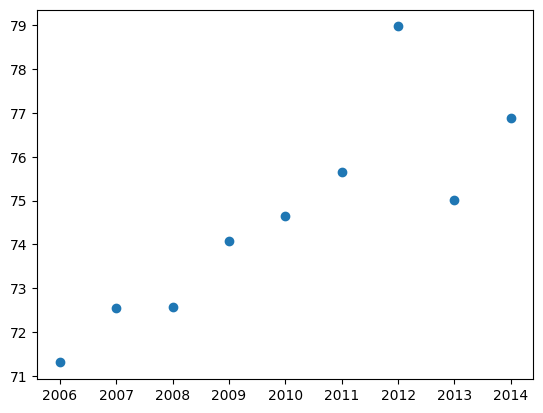

In [22]:
cols=['year']
y=data['wqi']
x=data[cols]
plt.scatter(x,y)
plt.show()

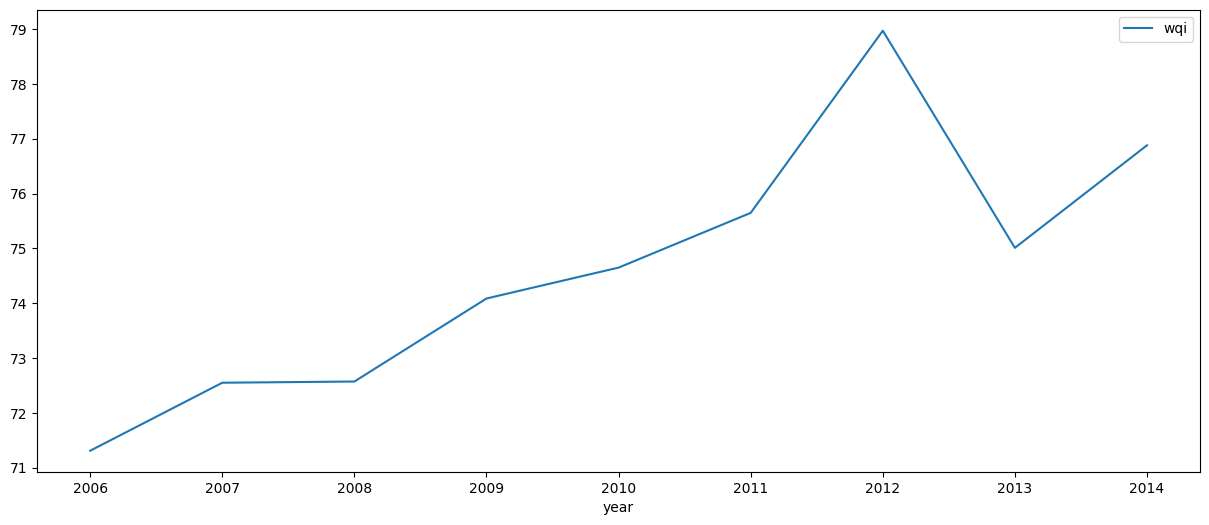

In [23]:
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [24]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588


In [25]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [26]:
cols=['year']

In [27]:
y=data['wqi']
x=data[cols]

In [28]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [30]:
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
a=reg.predict(x_test)
a

array([73.86206246, 74.59948715])

In [32]:
y_test

3    74.085193
4    74.648723
Name: wqi, dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:0.03


In [35]:
dt=pd.DataFrame({'Actual':y_test,'Predicted':a})

In [38]:
x=(x-x.mean())/x.std()
x=np.c_[np.ones(x.shape[0]),x]
x

array([[ 1.00000000e+00, -1.46059349e+00],
       [ 1.00000000e+00, -1.09544512e+00],
       [ 1.00000000e+00, -7.30296743e-01],
       [ 1.00000000e+00, -3.65148372e-01],
       [ 1.00000000e+00,  2.46716228e-17],
       [ 1.00000000e+00,  3.65148372e-01],
       [ 1.00000000e+00,  7.30296743e-01],
       [ 1.00000000e+00,  1.09544512e+00],
       [ 1.00000000e+00,  1.46059349e+00]])

In [41]:
alpha =0.1
iterations=3000
m=y.size
np.random.seed(4)
theta =np.random.rand(2)
def gradient_descent(x,y,theta,iterations,alpha):
    past_costs=[]
    past_thetas=[theta]
    for i in range(iterations):
        prediction=np.dot(x,theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta=theta-(alpha*(1/m)*np.dot(x.T,error))
        past_thetas.append(theta)
    return past_thetas,past_costs
past_thetas,past_costs=gradient_descent(x,y,theta,iterations,alpha)
theta=past_thetas[-1]
print("Gradient Descent:{:2f}.{:2f}".format(theta[0],theta[1]))        

Gradient Descent:74.629750.2.009336


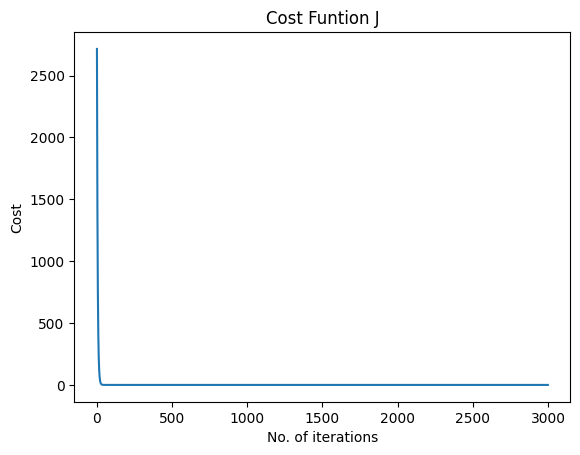

In [43]:
plt.title('Cost Funtion J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [49]:
import numpy as np
newB=[74.76,2.13]
def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse
y_pred=x.dot(newB)
dt=pd.DataFrame({'Actual':y,'predicted':y_pred})
dt=pd.concat([data,dt],axis=1)
dt

,year,wqi,Actual,predicted
0,2006,71.308824,71.308824,71.648936
1,2007,72.549000,72.549000,72.426702
2,2008,72.570943,72.570943,73.204468
3,2009,74.085193,74.085193,73.982234
4,2010,74.648723,74.648723,74.760000
5,2011,75.647013,75.647013,75.537766
6,2012,78.969041,78.969041,76.315532
7,2013,75.009425,75.009425,77.093298
8,2014,76.879588,76.879588,77.871064


In [50]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))



1.1987755149740729


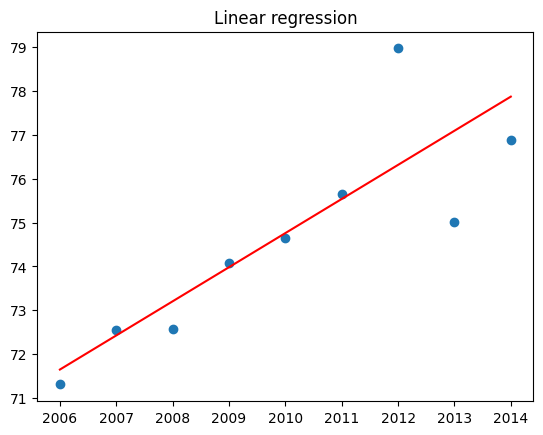

In [52]:
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("Linear regression")
plt.show()